In [2]:
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets
from sklearn.ensemble import GradientBoostingClassifier # For classification using Gradient Boosting
from sklearn.preprocessing import StandardScaler        # For feature scaling
from sklearn.metrics import accuracy_score              # To evaluate model performance

# Load the data
path = 'D:\BIM\Summer Project\datasets\cleaned_ibm_dataset.pkl'
data = pd.read_pickle(path)

<>:9: SyntaxWarning: invalid escape sequence '\B'
<>:9: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_10636\698313804.py:9: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\datasets\cleaned_ibm_dataset.pkl'


In [3]:
# Split the data into features and target
X = data.drop('Attrition', axis=1) # Input variables
y = data['Attrition'] # Variable to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(1102, 53) (368, 53) (1102,) (368,)


In [10]:
# Create and train the logistic regression model
model = GradientBoostingClassifier(n_estimators=100, random_state=42) # Instance of the model
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f'\nModel accuracy: {accuracy:.2f}\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


Model accuracy: 0.88

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       318
           1       0.68      0.26      0.38        50

    accuracy                           0.88       368
   macro avg       0.79      0.62      0.66       368
weighted avg       0.87      0.88      0.86       368



[[311   7]
 [ 36  14]]


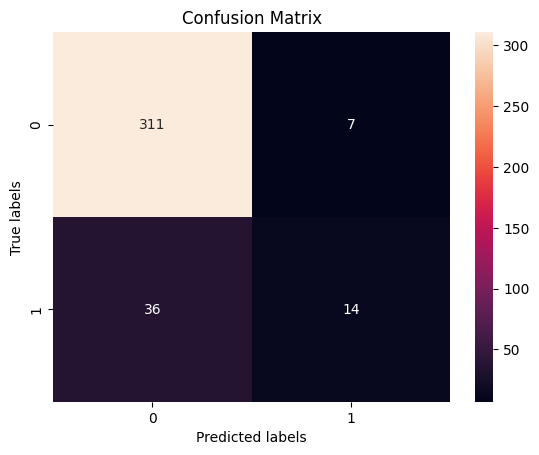

In [7]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.title('Confusion Matrix')
plt.show()

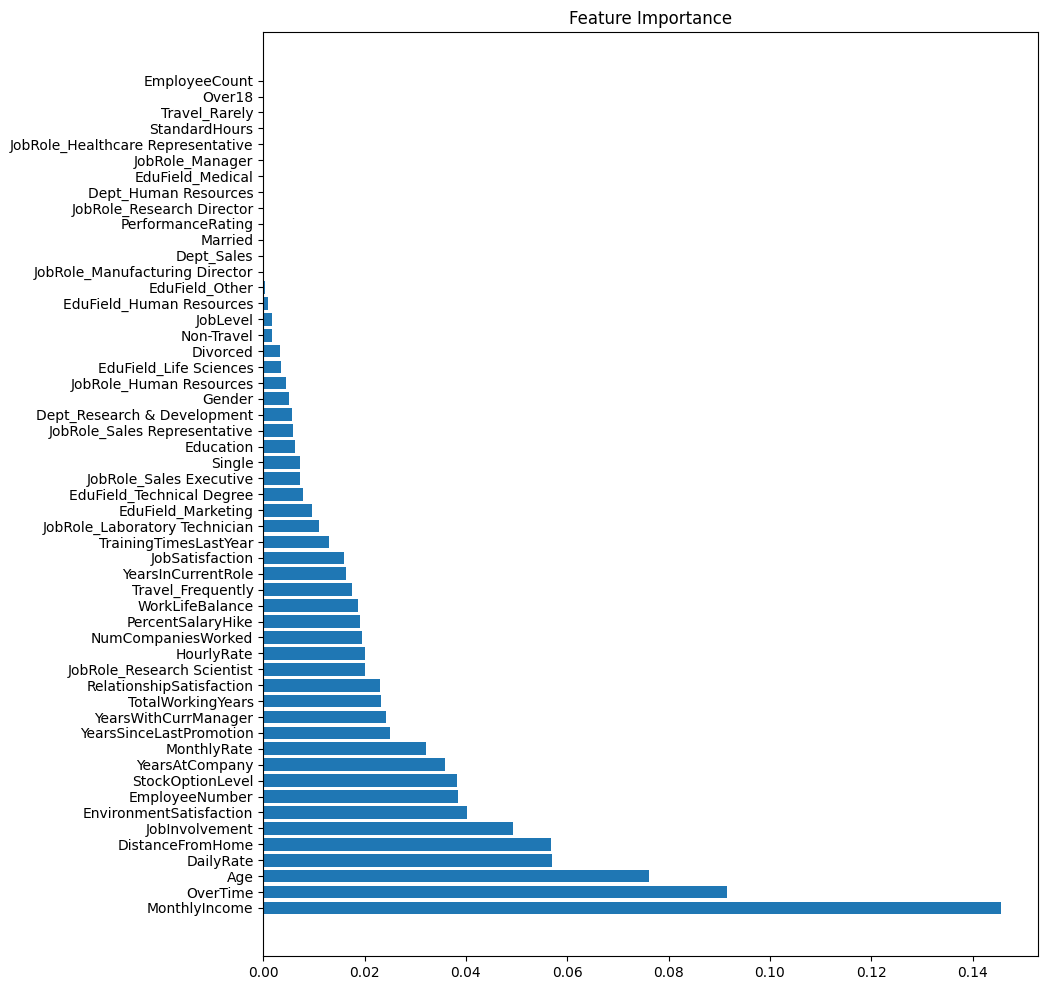

In [8]:
features = X.columns
importance = model.feature_importances_
indices =np.argsort(importance)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 12))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), labels=names)
plt.show()